In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [0]:
import io # To continue using the file
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn import linear_model

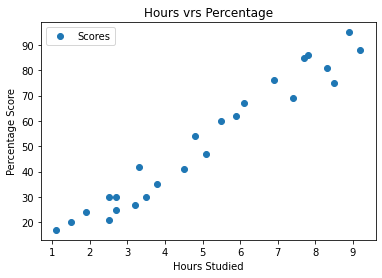

In [7]:
dataset = pd.read_csv(io.BytesIO(uploaded['data.csv']), sep=',', header=0)
dataset.plot(x='Hours', y='Scores', style='o')
plt.title("Hours vrs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()


In [17]:
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(regressor.intercept_)

2.018160041434662


In [20]:
print(regressor.coef_)

[9.91065648]


In [0]:
y_pred = regressor.predict(X_test)

In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [24]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE 4.183859899002982
MSE 21.598769307217456
RMSE 4.647447612100373


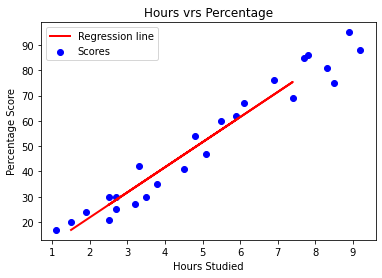

In [25]:
plt.scatter(X, y, color='blue', label='Scores')
plt.plot(X_test, y_pred, color='red', linewidth=2, label= 'Regression line')
plt.legend(loc='upper left')
plt.title('Hours vrs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()